In [1]:
# Freqtrade Workspace

# Notebook Helper
%load_ext autoreload
%autoreload 2
%env WANDB_SILENT=true

# Standard Imports
from pathlib import Path
from typing import List, Callable, Tuple, Any
from wandb.wandb_run import Run
from datetime import datetime, timedelta
import attr
import gc
import os
import wandb
import nest_asyncio
import logging
import sys
import pandas as pd
import numpy as np

# Resolve CWD
gc.collect()
nest_asyncio.apply()

while "freqtrade" not in os.listdir():
    os.chdir("..")
    if "freqtrade" in os.listdir():
        nest_asyncio.apply()
        logger = logging.getLogger("freqtrade.ml")
        handler = logging.StreamHandler(stream=sys.stdout)
        handler.setFormatter(logging.Formatter("%(name)s - %(message)s"))
        logger.addHandler(handler)
        logger.setLevel(logging.DEBUG)

# Freqtrade Imports
from freqtrade.optimize.optimize_reports import text_table_add_metrics
from freqtrade.ml.lightning import LightningModule, LightningConfig
from freqtrade.ml.trainer import TradingTrainer
from freqtrade.ml.container import LightningContainer
from freqtrade.ml import loader, lightning_utils
from freqtrade.nbtools.preset import LocalPreset, ConfigPreset, FilePreset, CloudPreset
from freqtrade.nbtools.backtest import backtest
from freqtrade.nbtools import plotting, configs
from freqtrade.nbtools.helper import free_mem
from freqtrade.nbtools.pairs import PAIRS_HIGHCAP_NONSTABLE

# Constants
PATH_MOUNT = Path.cwd().parent / "mount"
PATH_DATA = PATH_MOUNT / "data" / "binance"
PATH_PRESETS = PATH_MOUNT / "presets"

# Define custom functions
def foo() -> str:
    return "bar"

env: WANDB_SILENT=true


ImportError: cannot import name 'FilePreset' from 'freqtrade.nbtools.preset' (C:\CS\Python\crypto-collection\freqtrade\superft\freqtrade\nbtools\preset\__init__.py)

In [2]:
preset = LocalPreset(
    path_local_preset=PATH_PRESETS / "nfi",
    timerange="20210501-20210503",
    path_data=PATH_DATA,
)

# NOTE: Optional!
# preset.overwrite_config(pairs=PAIRS_BLVT_DOWN)

stats, summary = backtest(preset, preset.default_strategy_code)
trades = pd.DataFrame(stats["strategy"]["NotebookStrategy"]["trades"])

freqtrade.nbtools.preset.base_preset - Setting config for nfi ...
freqtrade.nbtools.preset.base_preset - Setting arg `datadir` to C:\CS\Python\crypto-collection\freqtrade\mount\data\binance
freqtrade.nbtools.preset.base_preset - Setting arg `timerange` to 20210501-20210503
freqtrade.nbtools.backtest - Backtesting...
freqtrade.nbtools.backtest - Strategy using minimal_roi: {'0': 10}
freqtrade.nbtools.backtest - Strategy using timeframe: 5m
freqtrade.nbtools.backtest - Strategy using stoploss: -0.99
freqtrade.nbtools.backtest - Strategy using trailing_stop: False
freqtrade.nbtools.backtest - Strategy using trailing_stop_positive: 0.01
freqtrade.nbtools.backtest - Strategy using trailing_stop_positive_offset: 0.03
freqtrade.nbtools.backtest - Strategy using trailing_only_offset_is_reached: True
freqtrade.nbtools.backtest - Strategy using use_custom_stoploss: False
freqtrade.nbtools.backtest - Strategy using process_only_new_candles: True
freqtrade.nbtools.backtest - Strategy using order_t

ZeroDivisionError: division by zero

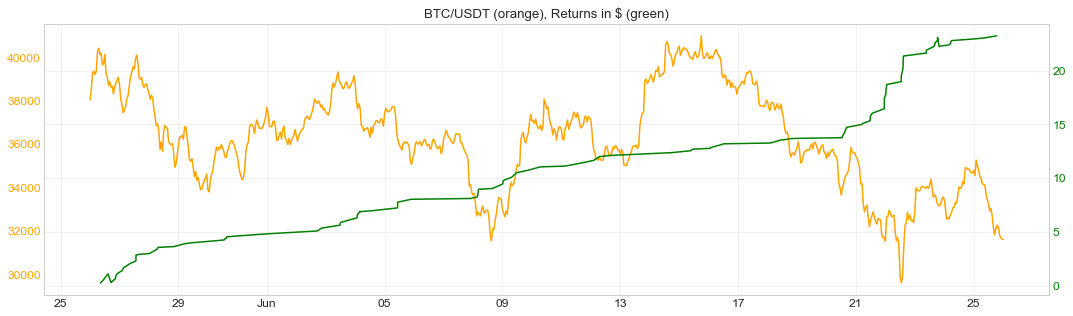

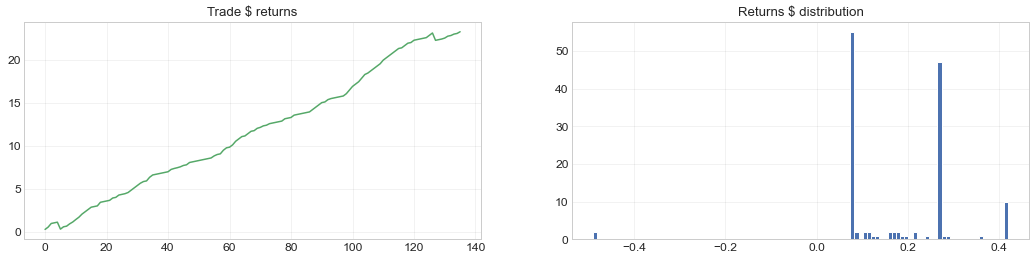

,Portfolio Summary
Min Balance,0.27
Max Balance,23.23
End Balance,23.23
Trades,136.00
Avg. Profit %,1.14
Avg. Profit $,0.17
Biggest Profit $,0.42
Biggest Loss $,-0.85


In [11]:
plotting.plot_profits(
    trades,
    start = "2021-05-26",
    end = "2021-06-26",
    path_mount = PATH_MOUNT
)

In [8]:
def process_result_dataframe(result_df):
    result_df = result_df.drop(columns=["profit_mean", "profit_total", "profit_sum"])
    result_df = result_df.sort_values(by=["profit_total_abs"], ascending=False)
    result_df = result_df.round(2)
    return result_df

# Running this cell will print backtest results
results = deepcopy(stats["strategy"]["NotebookStrategy"])

# Results per pair
results_per_pair = pd.DataFrame(results["results_per_pair"]).set_index("key")
results_per_pair = process_result_dataframe(results_per_pair)

# Sell reason stats
sells = pd.DataFrame(results['sell_reason_summary']).set_index("sell_reason")
sells = process_result_dataframe(sells)

# Left open trades
left_open_trades = pd.DataFrame(results['left_open_trades']).set_index("key")
left_open_trades = process_result_dataframe(left_open_trades)

# Summary metrics
metrics = text_table_add_metrics(results)
advanced_metrics = deepcopy(stats["metadata"])
advanced_metrics["profit_mean"] = advanced_metrics["profit_mean"] * 100
advanced_metrics["profit_median"] = advanced_metrics["profit_median"] * 100
advanced_metrics["profit_total"] = advanced_metrics["profit_total"] * 100

for key in list(advanced_metrics):
    value = advanced_metrics[key]
    valid = any(isinstance(value, it) for it in [str, int, float, bool])
    
    if not valid:
        del advanced_metrics[key]
        continue
    
    if isinstance(value, float):
        advanced_metrics[key] =  round(value, 3)
    
    advanced_metrics[key] = [advanced_metrics[key]]
    
advanced_metrics_df = pd.DataFrame(advanced_metrics)
    
print("Results Per Pair")
display(results_per_pair)
print("Sell Reasons")
display(sells)
print("Left Open Trades")
display(left_open_trades)
print("Freqtrade Summary Metrics")
print("=" * 48 + "\n" + metrics + "\n" + "=" * 48)
print("Advanced Metrics")
print("Preset Name:", advanced_metrics_df["preset_name"][0])
display(advanced_metrics_df.drop(columns=["preset_name"]).T)

Results Per Pair


,trades,profit_mean_pct,profit_sum_pct,profit_total_abs,profit_total_pct,duration_avg,wins,draws,losses
key,,,,,,,,,
TOTAL,461,1.26,579.42,87.00,8.70,1:57:00,452,0,9
DOGE/USDT,24,1.90,45.56,6.84,0.68,0:20:00,24,0,0
KSM/USDT,14,1.82,25.44,3.82,0.38,0:22:00,14,0,0
MATIC/USDT,15,1.68,25.17,3.78,0.38,0:35:00,15,0,0
ETC/USDT,18,1.36,24.48,3.68,0.37,0:32:00,18,0,0
CAKE/USDT,13,1.73,22.48,3.38,0.34,1:31:00,13,0,0
TFUEL/USDT,12,1.84,22.11,3.32,0.33,0:24:00,12,0,0
BAKE/USDT,11,1.68,18.50,2.78,0.28,0:35:00,11,0,0
DOT/USDT,12,1.53,18.35,2.75,0.28,0:32:00,12,0,0


Sell Reasons


,trades,wins,draws,losses,profit_mean_pct,profit_sum_pct,profit_total_abs,profit_total_pct
sell_reason,,,,,,,,
roi,452,452,0,0,1.51,684.30,102.75,114.05
force_sell,1,0,0,1,-10.25,-10.25,-1.54,-1.71
trailing_stop_loss,8,0,0,8,-11.83,-94.64,-14.21,-15.77


Left Open Trades


,trades,profit_mean_pct,profit_sum_pct,profit_total_abs,profit_total_pct,duration_avg,wins,draws,losses
key,,,,,,,,,
EOS/USDT,1,-10.25,-10.25,-1.54,-0.15,"4 days, 11:05:00",0,0,1
TOTAL,1,-10.25,-10.25,-1.54,-0.15,"4 days, 11:05:00",0,0,1


Freqtrade Summary Metrics
| Metric                 | Value               |
|------------------------+---------------------|
| Backtesting from       | 2021-05-01 00:00:00 |
| Backtesting to         | 2021-07-17 16:30:00 |
| Max open trades        | 6                   |
|                        |                     |
| Total/Daily Avg Trades | 461 / 5.99          |
| Starting balance       | 1000.000 USDT       |
| Final balance          | 1087.000 USDT       |
| Absolute profit        | 87.000 USDT         |
| Total profit %         | 8.7%                |
| Avg. stake amount      | 15.000 USDT         |
| Total trade volume     | 6915.000 USDT       |
|                        |                     |
| Best Pair              | DOGE/USDT 45.56%    |
| Worst Pair             | CELO/USDT -35.49%   |
| Best trade             | MKR/USDT 2.8%       |
| Worst trade            | CELO/USDT -40.58%   |
| Best day               | 9.712 USDT          |
| Worst day              | -1.539 USDT     

,0
random_name,disgusted-kirito-keyboard
preset_type,LocalPreset
backtest_date,2021-07-26 14:53:15
leverage,1
direction,long
is_hedging,False
fee,0.001
num_pairs,64
data_source,binance
win_rate,0.98
